In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('international-airline-passengers.csv')

In [4]:
data.head()

,Month,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
int(0.7*(len(data)))

100

In [6]:
#divide into train and validation set
train = data[:int(0.7*(len(data)))]
valid = data[int(0.7*(len(data))):]

In [7]:
valid.head()

,Month,passengers
100,1957-05,355
101,1957-06,422
102,1957-07,465
103,1957-08,467
104,1957-09,404


In [8]:
#preprocessing (since arima takes univariate series as input)
train.drop('Month',axis=1,inplace=True)
valid.drop('Month',axis=1,inplace=True)

C:\Users\fxnik\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


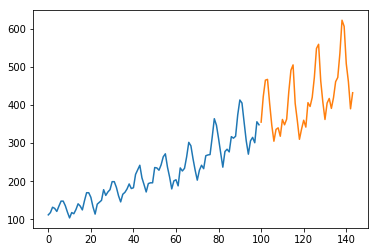

In [9]:
#plotting the data
plt.plot('passengers', data = train)
plt.plot('passengers', data = valid)

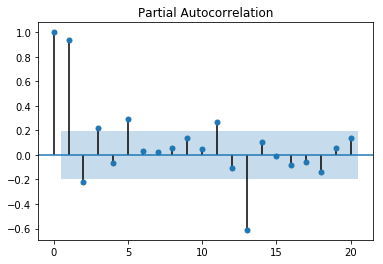

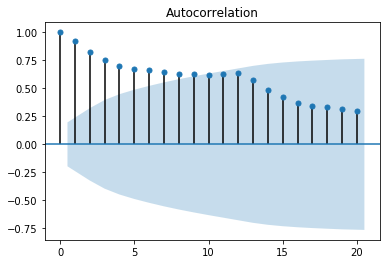

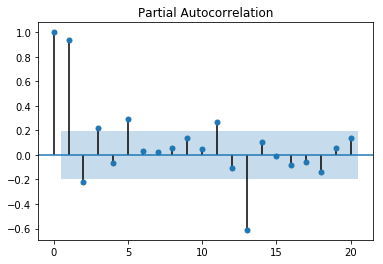

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

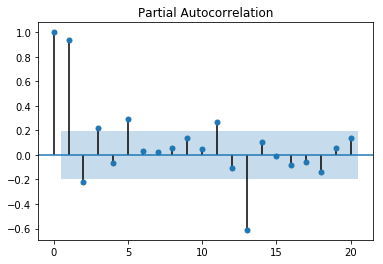

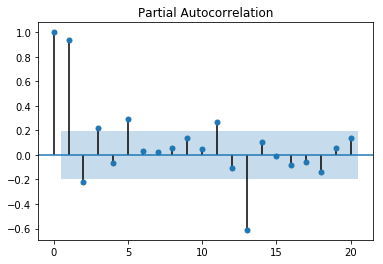

In [21]:
plot_pacf(train)

In [14]:
diff = train.diff(periods = 1)[1:] #removed NaN row
diff.head()

,passengers
1,6.0
2,14.0
3,-3.0
4,-8.0
5,14.0


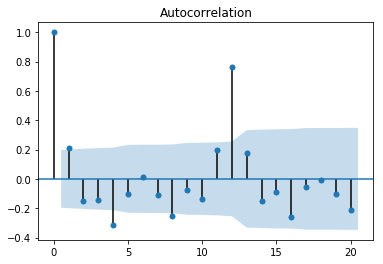

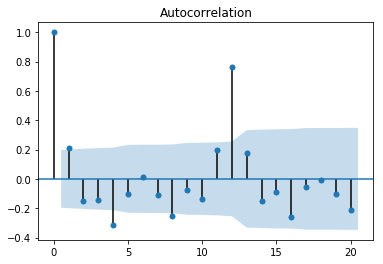

In [17]:
plot_acf(diff)

In [16]:
#building the model
from statsmodels.tsa.arima_model import ARIMA

In [17]:
train.head()

,passengers
0,112
1,118
2,132
3,129
4,121


In [18]:
model = ARIMA(train, order = (1,1,1))

In [19]:
myFit = model.fit()

In [27]:
forecast = myFit.forecast(steps = len(valid))

In [33]:
forecast[0]

array([346.56881298, 346.22487102, 346.65481053, 347.63558493,
       349.00843369, 350.66035391, 352.51091218, 354.50285744,
       356.5954394 , 358.75965276, 360.97485207, 363.22634224,
       365.5036636 , 367.79937114, 370.10816563, 372.42627518,
       374.75101501, 377.08047416, 379.41329244, 381.74850168,
       384.08541277, 386.42353521, 388.76251986, 391.10211821,
       393.44215339, 395.7824995 , 398.12306691, 400.46379186,
       402.80462892, 405.14554579, 407.48651947, 409.82753358,
       412.16857647, 414.50963985, 416.8507178 , 419.19180614,
       421.53290186, 423.87400284, 426.21510756, 428.55621494,
       430.89732423, 433.23843486, 435.57954645, 437.92065872])

In [34]:
forecast_1 = pd.DataFrame(forecast[0],index = valid.index,columns=['Prediction'])

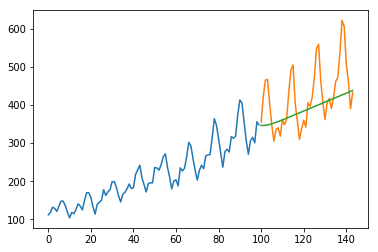

In [35]:
#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast_1, label='Prediction')
plt.show()

In [40]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(valid,forecast_1))
print(rms)

74.64534461310879


In [41]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [43]:
mape = mean_absolute_percentage_error(valid,forecast_1)
mape

11.777208653269545